# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Tangonan, Darwin James\
_Student No._: 2022-08539\
_Section_: TX3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: DARWI JAMES JARDINICO TANGONAN**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

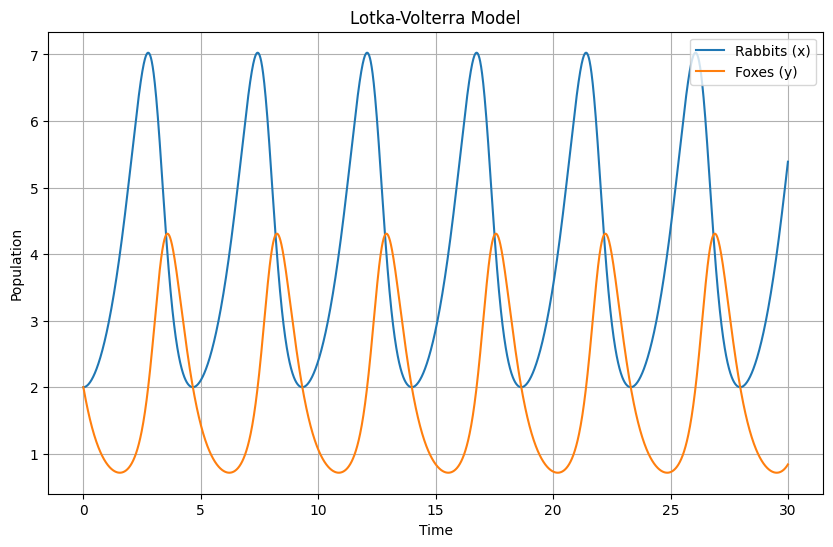

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 2.0

# Number of steps
dt = 0.01
n_steps = int(30 / dt)

# Arrays to store the results
t = np.linspace(0, 30, n_steps)
x = np.zeros(n_steps)
y = np.zeros(n_steps)

# Initial values
x[0] = y[0] = 2

# Runge-Kutta 4th order method
for i in range(1, n_steps):
    k1_x = dt * (alpha * x[i-1] - beta * x[i-1] * y[i-1])
    k1_y = dt * (gamma * x[i-1] * y[i-1] - delta * y[i-1])
    
    k2_x = dt * (alpha * (x[i-1] + 0.5 * k1_x) - beta * (x[i-1] + 0.5 * k1_x) * (y[i-1] + 0.5 * k1_y))
    k2_y = dt * (gamma * (x[i-1] + 0.5 * k1_x) * (y[i-1] + 0.5 * k1_y) - delta * (y[i-1] + 0.5 * k1_y))
    
    k3_x = dt * (alpha * (x[i-1] + 0.5 * k2_x) - beta * (x[i-1] + 0.5 * k2_x) * (y[i-1] + 0.5 * k2_y))
    k3_y = dt * (gamma * (x[i-1] + 0.5 * k2_x) * (y[i-1] + 0.5 * k2_y) - delta * (y[i-1] + 0.5 * k2_y))
    
    k4_x = dt * (alpha * (x[i-1] + k3_x) - beta * (x[i-1] + k3_x) * (y[i-1] + k3_y))
    k4_y = dt * (gamma * (x[i-1] + k3_x) * (y[i-1] + k3_y) - delta * (y[i-1] + k3_y))
    
    x[i] = x[i-1] + (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
    y[i] = y[i-1] + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Rabbits (x)')
plt.plot(t, y, label='Foxes (y)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Model')
plt.legend()
plt.grid(True)
plt.show()

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*
